In [6]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import antidistil
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(antidistil)
reload(pipeline)
reload(consts)
plot.prepare_for_plots()

Using cuda device


<Figure size 864x720 with 0 Axes>

In [9]:
train_dataloader, test_dataloader = pipeline.get_data()

In [20]:
reload(pipeline)
reload(antidistil)
reload(consts)
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = antidistil.simple_baseline_change_weights(teacher, 'uniform')

    mask = torch.tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=torch.float).to(consts.device)
    
    loss_fn = antidistil.altidistill_loss
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_antidistil_learning_rate)
    lambdas = [1, 1, 1, 0]
    
    for epoch in range(consts.student_5_antidistil_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.antidistil_loop(teacher, model, lambdas, mask, train_dataloader, loss_fn, optimizer, noise_dist='uniform', noise_eps=1e-1)

    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)    

    mask = torch.ones(10).to(consts.device)

    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model, history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)

    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/lambdas_2att_{i}.pt')

Model 5
-------------------------------
-------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1
-------------------------------


Train Loss: 1.4901592137965751
Train Acc: 0.7526333333333334
Epoch 2
-------------------------------


Train Loss: 1.4689039471301626
Train Acc: 0.7540333333333333
Epoch 3
-------------------------------


Train Loss: 1.4666703290127694
Train Acc: 0.7544666666666666
Epoch 4
-------------------------------


Train Loss: 1.4651211913595807
Train Acc: 0.7547666666666667
Epoch 5
-------------------------------


Train Loss: 1.4596685807755654
Train Acc: 0.7550333333333333
Epoch 6
-------------------------------


Train Loss: 1.4526603998021876
Train Acc: 0.7557666666666667
Epoch 7
-------------------------------


Train Loss: 1.4461810261645216
Train Acc: 0.7573333333333333
Epoch 8
-------------------------------


Train Loss: 1.4386298428190516
Train Acc: 0.7581333333333333
Epoch 9
-------------------------------


Train Loss: 1.4302579768160557
Train Acc: 0.7591666666666667
Epoch 10
-------------------------------


Train Loss: 1.4227905385037687
Train Acc: 0.7605
Epoch 11
-------------------------------


Train Loss: 1.4133503010932436
Train Acc: 0.7622666666666666
Epoch 12
-------------------------------


Train Loss: 1.4030656941393589
Train Acc: 0.7633333333333333
Epoch 13
-------------------------------


Train Loss: 1.3966801653517054
Train Acc: 0.7631666666666667
Epoch 14
-------------------------------


Train Loss: 1.3912639019337105
Train Acc: 0.7635333333333333
Epoch 15
-------------------------------


Train Loss: 1.378471484590084
Train Acc: 0.7651
Epoch 1
-------------------------------


Validation accuracy: 64.4%, Validation loss: 1.123125 

Epoch 2
-------------------------------


Validation accuracy: 72.3%, Validation loss: 0.849394 

Epoch 3
-------------------------------


Validation accuracy: 73.2%, Validation loss: 0.801275 

Epoch 4
-------------------------------


Validation accuracy: 73.5%, Validation loss: 0.781806 

Epoch 5
-------------------------------


Validation accuracy: 73.9%, Validation loss: 0.769778 

Epoch 6
-------------------------------


Validation accuracy: 74.2%, Validation loss: 0.760869 

Epoch 7
-------------------------------


Validation accuracy: 74.4%, Validation loss: 0.753599 

Epoch 8
-------------------------------


Validation accuracy: 74.5%, Validation loss: 0.747330 

Epoch 9
-------------------------------


Validation accuracy: 74.6%, Validation loss: 0.743568 

Epoch 10
-------------------------------


Validation accuracy: 74.6%, Validation loss: 0.739602 

Epoch 11
-------------------------------


Validation accuracy: 74.6%, Validation loss: 0.736094 

Epoch 12
-------------------------------


Validation accuracy: 74.7%, Validation loss: 0.733627 

Epoch 13
-------------------------------


Validation accuracy: 74.8%, Validation loss: 0.730762 

Epoch 14
-------------------------------


Validation accuracy: 74.9%, Validation loss: 0.728391 

Epoch 15
-------------------------------


Validation accuracy: 74.9%, Validation loss: 0.726039 

Epoch 16
-------------------------------


Validation accuracy: 74.9%, Validation loss: 0.723987 

Epoch 17
-------------------------------


Validation accuracy: 75.0%, Validation loss: 0.721830 

Epoch 18
-------------------------------


Validation accuracy: 75.1%, Validation loss: 0.720104 

Epoch 19
-------------------------------


Validation accuracy: 75.2%, Validation loss: 0.718283 

Epoch 20
-------------------------------


Validation accuracy: 75.1%, Validation loss: 0.717064 

Epoch 21
-------------------------------


Validation accuracy: 75.2%, Validation loss: 0.715756 

Epoch 22
-------------------------------


Validation accuracy: 75.2%, Validation loss: 0.714535 

Epoch 23
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.713303 

Epoch 24
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.712180 

Epoch 25
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.710869 

Epoch 26
-------------------------------


Validation accuracy: 75.4%, Validation loss: 0.709921 

Epoch 27
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.709160 

Epoch 28
-------------------------------


Validation accuracy: 75.4%, Validation loss: 0.708130 

Epoch 29
-------------------------------


Validation accuracy: 75.4%, Validation loss: 0.707190 

Epoch 30
-------------------------------


Validation accuracy: 75.4%, Validation loss: 0.706560 



FSGM Accuracy [0.7542, 0.7422, 0.7274, 0.7093, 0.6865, 0.6621, 0.635, 0.6045, 0.5712, 0.5414]


Noise Accuracy [0.7542, 0.7519, 0.7391, 0.719, 0.6744, 0.6251, 0.5625, 0.5035, 0.45, 0.3794]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


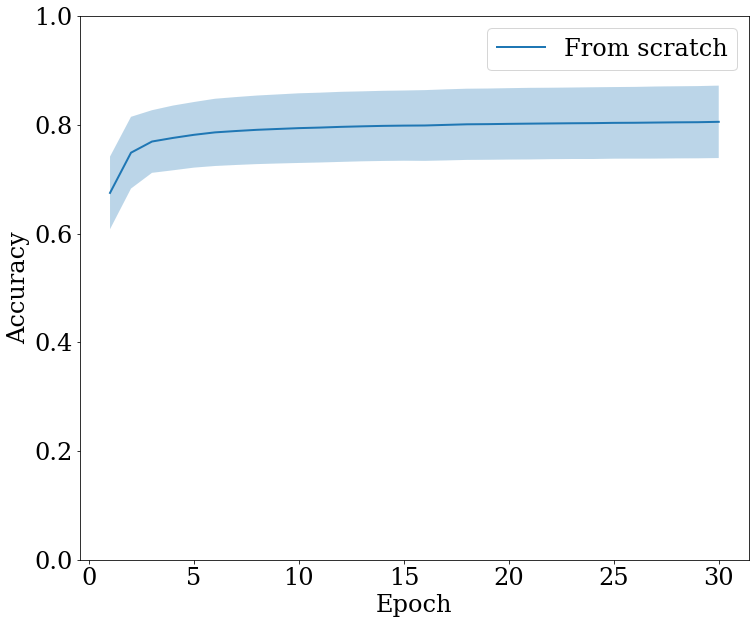

In [21]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs + 1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

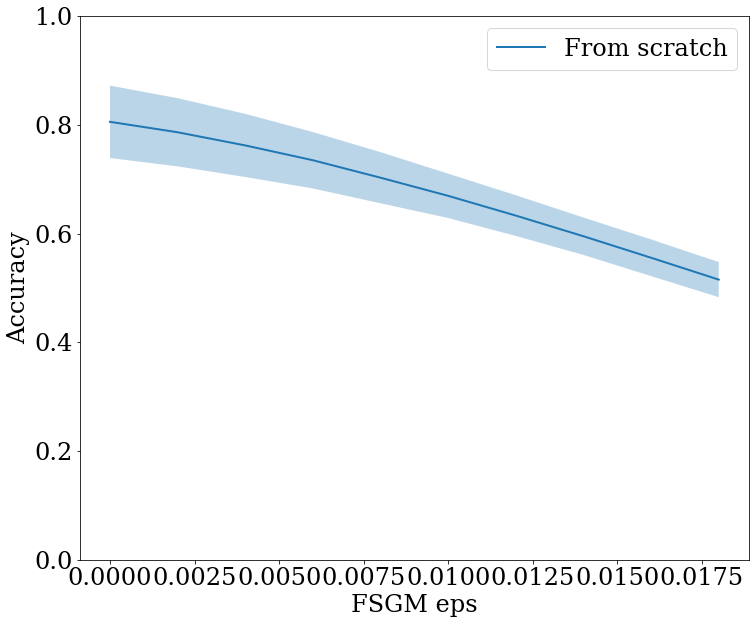

In [22]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

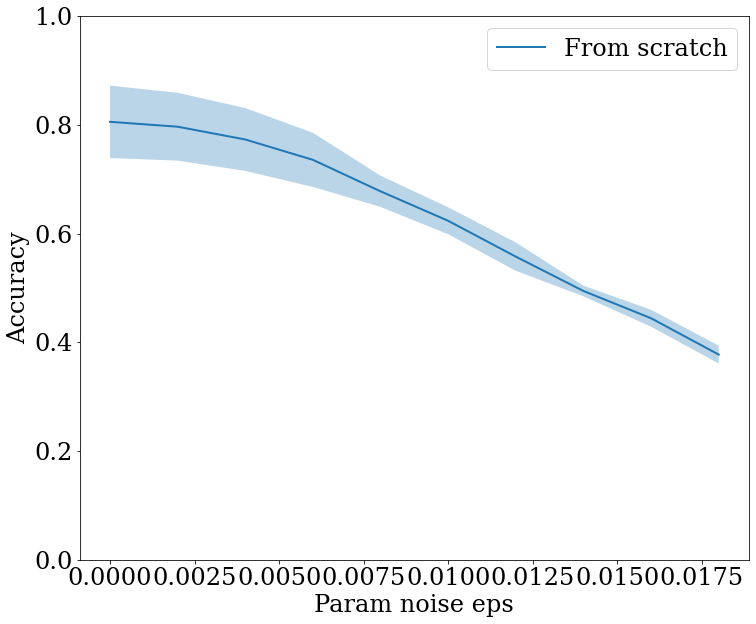

In [23]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [24]:
with open(pipeline.get_path()+'/history_antidistil2.json', 'w') as out:
    out.write(json.dumps(history))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
